In [1]:
import pandas as pd
import re
from nltk.tokenize import word_tokenize
import string
import time
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn import linear_model,svm
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from collections import Counter
from nltk.tokenize import sent_tokenize, word_tokenize, TweetTokenizer
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer 
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import CSVLogger
from keras.layers import Layer, Input, Embedding, Conv1D, Bidirectional, LSTM, Dense, Dropout, BatchNormalization, GlobalMaxPooling1D, Flatten
from sklearn.metrics import r2_score
from sklearn.metrics import roc_auc_score

import tensorflow as tf
import keras

from tensorflow.keras.optimizers import Adam

from sklearn.linear_model import PassiveAggressiveClassifier
from keras.layers import Bidirectional, LSTM, GRU
from keras.models import Sequential
from sklearn.metrics import roc_auc_score

In [2]:
data1=pd.read_csv("train.csv")
data2=pd.read_csv("test.csv")


In [3]:
data1

,text,label
0,The court granted by a 5-4 vote a request made...,real
1,""" Pennsylvania was a crucial swing state in th...",real
2,The company today is rolling out an update to ...,fake
3,"When it comes to trade policy, Hillary Clinton...",real
4,S. stocks had their worst April start since 19...,real
...,...,...
231998,Cipher Pharmaceuticals Inc * Cipher pharmaceut...,real
231999,Lyft and larger rival Uber face separate lawsu...,real
232000,Six-month Sterling Overnight Index Average (SO...,real
232001,Going on Museum Hack's Badass Bitches tour -- ...,fake


In [6]:
data2

,text,label
0,"We asked for ""disclosure of any information th...",fake
1,Continued disruptions by a range of local grou...,fake
2,Criminal gangs in China are faking outbreaks o...,fake
3,"""After we announced the Hess transaction, we h...",fake
4,A Syngenta spokesman clarified his comment ear...,fake
...,...,...
115994,esponse team. A unanimous three-judge panel of...,real
115995,S. market for Singapore Airlines and Malaysia ...,real
115996,The top enforcer of a brutal war on drugs in t...,real
115997,Two South Korean envoys will travel to the Uni...,real


In [7]:
#Combining all the data
data=pd.concat([data1, data2])

In [8]:
data = data.reset_index(drop=True)
data

,text,label
0,The court granted by a 5-4 vote a request made...,real
1,""" Pennsylvania was a crucial swing state in th...",real
2,The company today is rolling out an update to ...,fake
3,"When it comes to trade policy, Hillary Clinton...",real
4,S. stocks had their worst April start since 19...,real
...,...,...
347997,esponse team. A unanimous three-judge panel of...,real
347998,S. market for Singapore Airlines and Malaysia ...,real
347999,The top enforcer of a brutal war on drugs in t...,real
348000,Two South Korean envoys will travel to the Uni...,real


In [9]:
import nltk

nltk.download("stopwords")
from nltk.corpus import stopwords
stopwordlist = set(stopwords.words("english"))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ronee\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer()
def preprocess(text):
    # Convert to lowercase
    text = text.lower()
    #tokenize text
    tokenized_text = word_tokenize(text) 
    #remove stopwords and punctuations
    cleaned_tokens = [lemmatizer.lemmatize(t) for t in tokenized_text if t not in string.punctuation and t not in stopwordlist] #check if token is punctuation or not
    
    cleaned_string = " ".join(cleaned_tokens)    
    return cleaned_string

In [11]:
data["Clean Text"] = data["text"].apply(lambda x : preprocess(x))

In [12]:
data

,text,label,Clean Text
0,The court granted by a 5-4 vote a request made...,real,court granted 5-4 vote request made 27 state b...
1,""" Pennsylvania was a crucial swing state in th...",real,`` pennsylvania crucial swing state 2016 elect...
2,The company today is rolling out an update to ...,fake,company today rolling update android operating...
3,"When it comes to trade policy, Hillary Clinton...",real,come trade policy hillary clinton taking heat ...
4,S. stocks had their worst April start since 19...,real,s. stock worst april start since 1929 '' big p...
...,...,...,...
347997,esponse team. A unanimous three-judge panel of...,real,esponse team unanimous three-judge panel 8th u...
347998,S. market for Singapore Airlines and Malaysia ...,real,s. market singapore airline malaysia airline s...
347999,The top enforcer of a brutal war on drugs in t...,real,top enforcer brutal war drug philippine friday...
348000,Two South Korean envoys will travel to the Uni...,real,two south korean envoy travel united state thu...


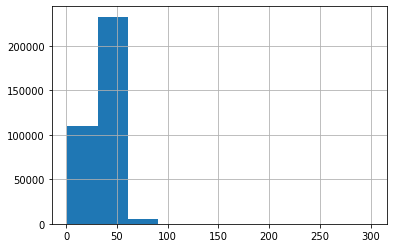

Mean: 37.0277
Std: 11.7848
Mean+3*Std = 72.3820


In [13]:
lengths = data["Clean Text"].apply(lambda x : len(x.split(" "))) # mean + 3*sigma
lengths.hist()
plt.show()

mean = lengths.mean()
std = lengths.std()
approx_nseq = mean + 3*std
print(f"Mean: {mean:.4f}\nStd: {std:.4f}\nMean+3*Std = {approx_nseq:.4f}")

In [14]:
N_SEQ = 64

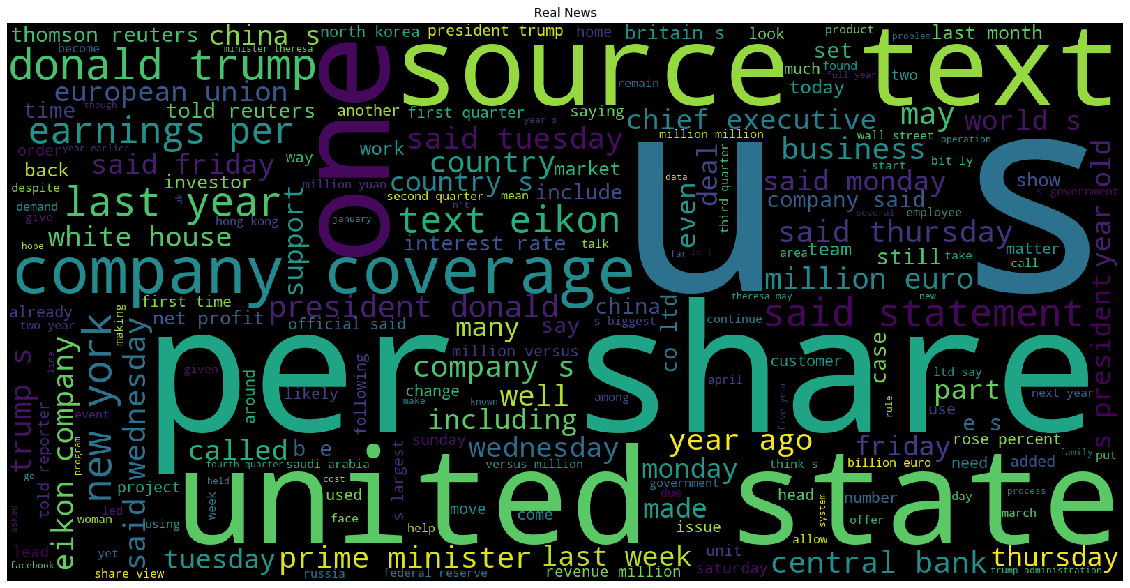

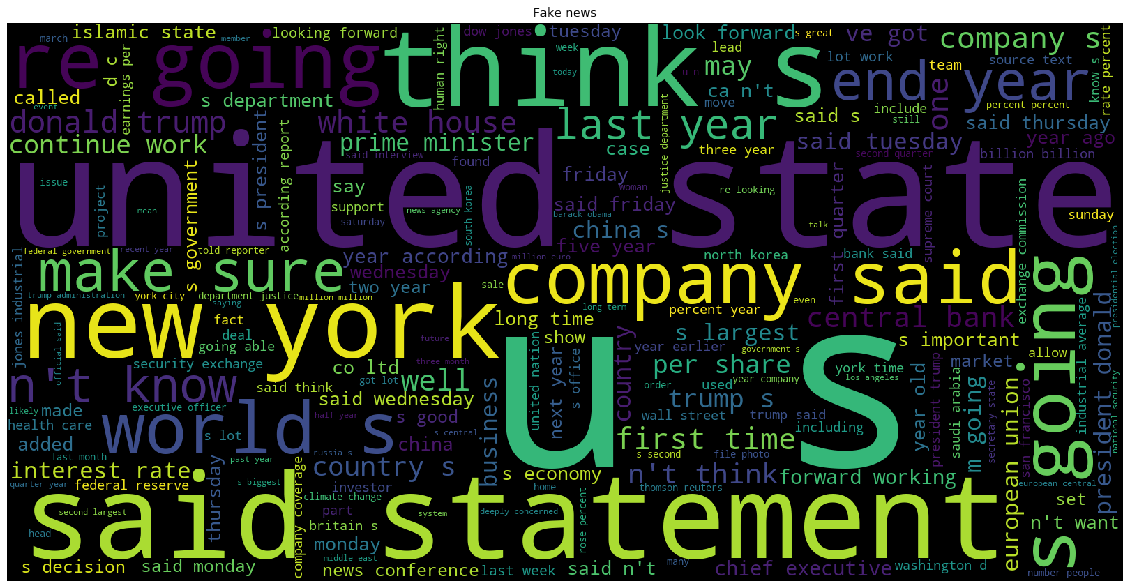

In [15]:
from wordcloud import WordCloud

df_pos = data.loc[data["label"] == "real"]
df_neg = data.loc[data["label"] == "fake"]

wc_pos = WordCloud(
    width = 1600, 
    height = 800, 
).generate(" ".join(df_pos["Clean Text"])) 

wc_neg = WordCloud(
    width = 1600, 
    height = 800, 
).generate(" ".join(df_neg["Clean Text"])) 

plt.figure(figsize = (20,20))
plt.imshow(wc_pos)
plt.title("Real News")
plt.axis("off")
plt.show()

plt.figure(figsize = (20,20))
plt.imshow(wc_neg)
plt.title("Fake news")
plt.axis("off")
plt.show()

In [16]:
print("Fake news count",len(data[data['label']=="fake"]))
print("Real news count",len(data[data['label']=="real"]))
data_copy = data.copy()

Fake news count 100877
Real news count 247125


In [17]:

data_copy["target"] = data_copy["label"].map({"fake": 1, "real": 0,})

In [18]:
data_copy

,text,label,Clean Text,target
0,The court granted by a 5-4 vote a request made...,real,court granted 5-4 vote request made 27 state b...,0
1,""" Pennsylvania was a crucial swing state in th...",real,`` pennsylvania crucial swing state 2016 elect...,0
2,The company today is rolling out an update to ...,fake,company today rolling update android operating...,1
3,"When it comes to trade policy, Hillary Clinton...",real,come trade policy hillary clinton taking heat ...,0
4,S. stocks had their worst April start since 19...,real,s. stock worst april start since 1929 '' big p...,0
...,...,...,...,...
347997,esponse team. A unanimous three-judge panel of...,real,esponse team unanimous three-judge panel 8th u...,0
347998,S. market for Singapore Airlines and Malaysia ...,real,s. market singapore airline malaysia airline s...,0
347999,The top enforcer of a brutal war on drugs in t...,real,top enforcer brutal war drug philippine friday...,0
348000,Two South Korean envoys will travel to the Uni...,real,two south korean envoy travel united state thu...,0


In [19]:
#To check if there is any null values present
print(data_copy.loc[:,["Clean Text","target"]].isna().sum())
print("\n Since both values are 0 no null values present")

Clean Text    0
target        0
dtype: int64

 Since both values are 0 no null values present


In [20]:
tt = TweetTokenizer()
data_copy['tokens']=data_copy['Clean Text'].apply(tt.tokenize)
words = Counter()
for idx in data_copy.index:
    words.update(data_copy.loc[idx, "tokens"])

In [21]:
#here you can see the most common tokens 
words.most_common(2000)

[("'", 603030),
 ('`', 357762),
 ('s', 334471),
 ('.', 232386),
 ('said', 181810),
 ('u', 82254),
 ('year', 82021),
 ('company', 80210),
 ('-', 75730),
 ('million', 70496),
 ('percent', 57776),
 ('new', 54541),
 ('state', 47485),
 ('billion', 46750),
 ('would', 46196),
 ('trump', 39146),
 ('share', 37928),
 ('president', 37013),
 ('also', 36709),
 ('reuters', 35746),
 ('first', 35314),
 ('bank', 34736),
 ("n't", 33978),
 ('time', 32823),
 ('people', 32673),
 ('say', 32407),
 ('one', 32286),
 ('government', 32008),
 ('last', 31110),
 ('inc', 29229),
 ('group', 29073),
 ('two', 27201),
 ('country', 26985),
 ('/', 26915),
 ('united', 26431),
 ('according', 25644),
 ('statement', 25233),
 ('per', 24958),
 ('market', 24114),
 ('tuesday', 24023),
 ('month', 23906),
 ('wednesday', 23652),
 ('thursday', 23568),
 ('report', 23347),
 ('world', 23204),
 ('china', 22812),
 ('going', 22604),
 ('week', 22377),
 ('deal', 22221),
 ('make', 20974),
 ('friday', 20954),
 ('source', 20884),
 ('re', 20723)

In [22]:
data=data_copy
data

,text,label,Clean Text,target,tokens
0,The court granted by a 5-4 vote a request made...,real,court granted 5-4 vote request made 27 state b...,0,"[court, granted, 5-4, vote, request, made, 27,..."
1,""" Pennsylvania was a crucial swing state in th...",real,`` pennsylvania crucial swing state 2016 elect...,0,"[`, `, pennsylvania, crucial, swing, state, 20..."
2,The company today is rolling out an update to ...,fake,company today rolling update android operating...,1,"[company, today, rolling, update, android, ope..."
3,"When it comes to trade policy, Hillary Clinton...",real,come trade policy hillary clinton taking heat ...,0,"[come, trade, policy, hillary, clinton, taking..."
4,S. stocks had their worst April start since 19...,real,s. stock worst april start since 1929 '' big p...,0,"[s, ., stock, worst, april, start, since, 1929..."
...,...,...,...,...,...
347997,esponse team. A unanimous three-judge panel of...,real,esponse team unanimous three-judge panel 8th u...,0,"[esponse, team, unanimous, three-judge, panel,..."
347998,S. market for Singapore Airlines and Malaysia ...,real,s. market singapore airline malaysia airline s...,0,"[s, ., market, singapore, airline, malaysia, a..."
347999,The top enforcer of a brutal war on drugs in t...,real,top enforcer brutal war drug philippine friday...,0,"[top, enforcer, brutal, war, drug, philippine,..."
348000,Two South Korean envoys will travel to the Uni...,real,two south korean envoy travel united state thu...,0,"[two, south, korean, envoy, travel, united, st..."


In [23]:
X_train, X_test, y_train, y_test  = train_test_split(
        data['Clean Text'], 
        data['target'],
        train_size=0.80, 
        random_state=1234)

In [24]:
print("X Train shape",X_train.shape)
print("y Train shape",y_train.shape)
print("fake news in Training",len(y_train[y_train==1]))
print("Real news in Training",len(y_train[y_train==0]))
print("X Test shape",X_test.shape)
print("fake news in Testing",len(y_test[y_test==1]))
print("Real news in Testing",len(y_test[y_test==0]))
print("y Test shape",y_test.shape)

X Train shape (278401,)
y Train shape (278401,)
fake news in Training 80825
Real news in Training 197576
X Test shape (69601,)
fake news in Testing 20052
Real news in Testing 49549
y Test shape (69601,)


# Dividing the data according to Bag of words approach

In [25]:
def BOG(m,n,Total_clean_train,Total_clean_test):
    vectorizer = CountVectorizer(min_df=100,max_features=m,ngram_range=(1,n))
    analyze = vectorizer.build_analyzer
    Count_X_train = vectorizer.fit_transform(Total_clean_train).toarray()
    Count_X_test = vectorizer.transform(Total_clean_test).toarray()
    
    return Count_X_train,Count_X_test

In [26]:
Count_X_train,Count_X_test=BOG(2000 ,2,X_train,X_test)

In [27]:
print("X train shape",Count_X_train.shape)
print("X test shape",Count_X_test.shape)

X train shape (278401, 2000)
X test shape (69601, 2000)


# Logistic regression

In [28]:
start = time.time()
logisticReg = linear_model.LogisticRegression(multi_class='ovr')
logisticReg.fit(Count_X_train, y_train)
Y_predict=logisticReg.predict(Count_X_test)
print(classification_report(y_test,Y_predict))
print("AUC score",roc_auc_score(y_test, Y_predict))
end = time.time()
print(end - start, " s")

C:\Users\ronee\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


              precision    recall  f1-score   support

           0       0.81      0.92      0.86     49549
           1       0.71      0.46      0.56     20052

    accuracy                           0.79     69601
   macro avg       0.76      0.69      0.71     69601
weighted avg       0.78      0.79      0.77     69601

AUC score 0.6918727045619552
55.1470046043396  s


# Support Vector Machine

In [29]:
start = time.time()
lin_clf = svm.LinearSVC()
lin_clf.fit(Count_X_train, y_train)
Y_SVC_linear_predic=lin_clf.predict(Count_X_test)
print(classification_report(y_test,Y_SVC_linear_predic))
print("AUC score",roc_auc_score(y_test, Y_SVC_linear_predic))
end = time.time()
print(end - start, " s")

C:\Users\ronee\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


              precision    recall  f1-score   support

           0       0.80      0.93      0.86     49549
           1       0.72      0.44      0.55     20052

    accuracy                           0.79     69601
   macro avg       0.76      0.69      0.70     69601
weighted avg       0.78      0.79      0.77     69601

AUC score 0.6852465920238694
100.4475462436676  s


# Naive Bayes

In [30]:
start = time.time()
gnb = GaussianNB()
Y_pred_Bayes = gnb.fit(Count_X_train, y_train).predict(Count_X_test)
print(classification_report(y_test,Y_pred_Bayes))
print("AUC score",roc_auc_score(y_test, Y_pred_Bayes))

end = time.time()
print(end - start, " s")

              precision    recall  f1-score   support

           0       0.85      0.67      0.75     49549
           1       0.47      0.71      0.56     20052

    accuracy                           0.68     69601
   macro avg       0.66      0.69      0.66     69601
weighted avg       0.74      0.68      0.70     69601

AUC score 0.6924143697556306
13.146278619766235  s


# PassiveAggressiveClassifier

In [31]:
start = time.time()
PAC =PassiveAggressiveClassifier()
Y_pred_PAC = PAC.fit(Count_X_train, y_train).predict(Count_X_test)
print(classification_report(y_test,Y_pred_PAC))
end = time.time()
print("AUC score",roc_auc_score(y_test, Y_pred_PAC))
print(end - start, " s")

              precision    recall  f1-score   support

           0       0.78      0.80      0.79     49549
           1       0.47      0.44      0.45     20052

    accuracy                           0.69     69601
   macro avg       0.62      0.62      0.62     69601
weighted avg       0.69      0.69      0.69     69601

AUC score 0.6167922391871752
13.649341583251953  s


# TFIDF

In [32]:
def scikit_TFIDF(m,n,Total_clean_train,Total_clean_test):
    vectorizer = CountVectorizer(min_df=100,max_features=m,ngram_range=(1,n))
    analyze = vectorizer.build_analyzer
    X_train = vectorizer.fit_transform(Total_clean_train).toarray()
    X_test = vectorizer.transform(Total_clean_test).toarray()
    transformer = TfidfTransformer()
    tfidf_train=transformer.fit_transform(X_train).toarray()
    tfidf_test=transformer.transform(X_test).toarray()
    return tfidf_train,tfidf_test

In [33]:
tfidf_X_train,tfidf_X_test=scikit_TFIDF(2000 ,2,X_train,X_test)

# Logistic regression

In [34]:
start = time.time()
logisticReg = linear_model.LogisticRegression(multi_class='ovr')
logisticReg.fit(tfidf_X_train, y_train)
Y_predict=logisticReg.predict(tfidf_X_test)
print(classification_report(y_test,Y_predict))
print("AUC score",roc_auc_score(y_test, Y_predict))
end = time.time()
print(end - start, " s")

C:\Users\ronee\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


              precision    recall  f1-score   support

           0       0.81      0.92      0.86     49549
           1       0.71      0.47      0.56     20052

    accuracy                           0.79     69601
   macro avg       0.76      0.70      0.71     69601
weighted avg       0.78      0.79      0.78     69601

AUC score 0.6956250501204486
52.358439683914185  s


# Support Vector Machine

In [35]:
start = time.time()
lin_clf = svm.LinearSVC()
lin_clf.fit(tfidf_X_train, y_train)
Y_SVC_linear_predic=lin_clf.predict(tfidf_X_test)
print(classification_report(y_test,Y_SVC_linear_predic))
print("AUC score",roc_auc_score(y_test, Y_SVC_linear_predic))

end = time.time()
print(end - start, " s")

              precision    recall  f1-score   support

           0       0.81      0.93      0.86     49549
           1       0.71      0.46      0.56     20052

    accuracy                           0.79     69601
   macro avg       0.76      0.69      0.71     69601
weighted avg       0.78      0.79      0.77     69601

AUC score 0.691492679387988
22.658429622650146  s


# Naive Bayes

In [36]:
start = time.time()
gnb = GaussianNB()
Y_pred_Bayes = gnb.fit(tfidf_X_train, y_train).predict(tfidf_X_test)
print(classification_report(y_test,Y_pred_Bayes))
print("AUC score ",roc_auc_score(y_test, Y_pred_Bayes))

end = time.time()
print(end - start, " s")

              precision    recall  f1-score   support

           0       0.85      0.72      0.78     49549
           1       0.50      0.69      0.58     20052

    accuracy                           0.71     69601
   macro avg       0.67      0.70      0.68     69601
weighted avg       0.75      0.71      0.72     69601

AUC score  0.7027698261417931
10.347397327423096  s


# Passive Aggressive Classifier

In [37]:
start = time.time()
PAC =PassiveAggressiveClassifier()
Y_pred_PAC = PAC.fit(tfidf_X_train, y_train).predict(tfidf_X_test)
print(classification_report(y_test,Y_pred_PAC))
print("AUC score ",roc_auc_score(y_test, Y_pred_PAC))
# print(accuracy_score(y_test, Y_pred_PAC))

end = time.time()
print(end - start, " s")


              precision    recall  f1-score   support

           0       0.80      0.88      0.84     49549
           1       0.61      0.46      0.52     20052

    accuracy                           0.76     69601
   macro avg       0.71      0.67      0.68     69601
weighted avg       0.75      0.76      0.75     69601

AUC score  0.6695795099324332
10.621184349060059  s


# RNN-LSTM model

In [39]:
t = Tokenizer()
t.fit_on_texts(X_train)
word_index = t.word_index
N_vocab = len(t.word_index) + 1 # This +1 is used later 
print(N_vocab)

141185


In [40]:
x_train = pad_sequences(t.texts_to_sequences(X_train), maxlen = N_SEQ)
x_test   = pad_sequences(t.texts_to_sequences(X_test), maxlen = N_SEQ)
y_train = y_train.to_numpy(dtype = float).reshape(-1, 1)
y_test   = y_test.to_numpy(dtype = float).reshape(-1, 1)

In [41]:
# Maps each word in the embeddings vocabulary to it's embedded representation 
embeddings_index = {}
with open("glove.twitter.27B.200d[1].txt", "r", errors="ignore", encoding="utf8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype="float32")
        embeddings_index[word] = coefs

In [42]:
# Maps each word in our vocab to it's embedded representation, if the word is present in the GloVe embeddings
N_EMB = 200
embedding_matrix = np.zeros((N_vocab, N_EMB))
n_match = 0
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        n_match += 1
        embedding_matrix[i] = embedding_vector
print(n_match)

70720


In [43]:
# Dimensionality of the hidden state h_t outputted by the LSTM
DIM_HIDDEN = 64 

In [79]:
model=Sequential()
model.add(Input(shape=(N_SEQ,)))
model.add(Embedding(N_vocab,N_EMB, weights = [embedding_matrix], input_length = N_SEQ, trainable = False ))
model.add(LSTM(units=DIM_HIDDEN,dropout = 0.5, return_sequences = True))
model.add(Flatten())

model.add(Dense(1024, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(32, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(1, activation = "sigmoid"))

In [80]:
check4 = tf.keras.callbacks.ModelCheckpoint(filepath="weights4.h5",monitor="val_accuracy",mode="max",save_best_only=True,)
log4 = CSVLogger('log4.csv', append=True, separator=',')

In [81]:
model.compile(optimizer = Adam(learning_rate = 0.0001), loss = "binary_crossentropy", metrics = ["accuracy"])
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 64, 200)           28237000  
                                                                 
 lstm_1 (LSTM)               (None, 64, 64)            67840     
                                                                 
 flatten_3 (Flatten)         (None, 4096)              0         
                                                                 
 dense_12 (Dense)            (None, 1024)              4195328   
                                                                 
 dropout_9 (Dropout)         (None, 1024)              0         
                                                                 
 dense_13 (Dense)            (None, 256)               262400    
                                                                 
 dropout_10 (Dropout)        (None, 256)              

In [82]:
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

In [83]:
history = model.fit(
    x_train, 
    y_train, 
    batch_size = 256, 
    epochs = 20,
    verbose=1,
    validation_data = (x_test, y_test), 
    callbacks=[check4,log4]
)

Epoch 1/20
1088/1088 [==============================] - 147s 134ms/step - loss: 0.5603 - accuracy: 0.7351 - val_loss: 0.5110 - val_accuracy: 0.7725
Epoch 2/20
1088/1088 [==============================] - 151s 139ms/step - loss: 0.5222 - accuracy: 0.7654 - val_loss: 0.4805 - val_accuracy: 0.7917
Epoch 3/20
1088/1088 [==============================] - 150s 138ms/step - loss: 0.5076 - accuracy: 0.7766 - val_loss: 0.4712 - val_accuracy: 0.7990
Epoch 4/20
1088/1088 [==============================] - 154s 142ms/step - loss: 0.4962 - accuracy: 0.7864 - val_loss: 0.4643 - val_accuracy: 0.8063
Epoch 5/20
1088/1088 [==============================] - 153s 140ms/step - loss: 0.4857 - accuracy: 0.7928 - val_loss: 0.4615 - val_accuracy: 0.8050
Epoch 6/20
1088/1088 [==============================] - 153s 140ms/step - loss: 0.4783 - accuracy: 0.7974 - val_loss: 0.4579 - val_accuracy: 0.8073
Epoch 7/20
1088/1088 [==============================] - 158s 145ms/step - loss: 0.4725 - accuracy: 0.8014 - val_

In [84]:
transfer_model = tf.keras.models.load_model('weights4.h5')

In [85]:
transfer_model.evaluate(x_test, y_test,batch_size=256, verbose=1)

272/272 [==============================] - 13s 45ms/step - loss: 0.4476 - accuracy: 0.8137


[0.44761404395103455, 0.8136951923370361]

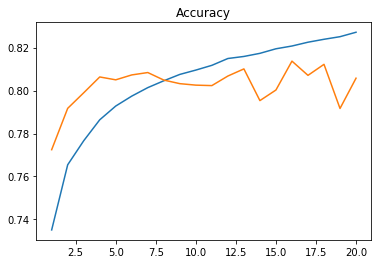

In [86]:
N_EPOCHS=20
metrics = history.history
t_acc = metrics["accuracy"]
t_loss = metrics["loss"]
v_acc = metrics["val_accuracy"]
v_loss = metrics["val_loss"]

epochs = range(1, N_EPOCHS + 1)

plt.plot(epochs, t_acc)
plt.plot(epochs, v_acc)
plt.title("Accuracy")


plt.show()

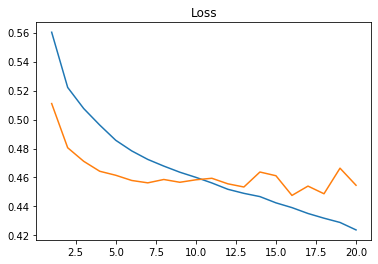

In [87]:
N_EPOCHS=20
metrics = history.history
t_acc = metrics["accuracy"]
t_loss = metrics["loss"]
v_acc = metrics["val_accuracy"]
v_loss = metrics["val_loss"]

epochs = range(1, N_EPOCHS + 1)

plt.plot(epochs, t_loss)
plt.plot(epochs, v_loss)
plt.title("Loss")


plt.show()

In [88]:
predictions = transfer_model.predict(x_test,batch_size=256)

In [89]:
len(predictions)

69601

In [90]:
y_pred = predictions
for i in range(len(predictions)):
    if predictions[i]>=0.5:
        y_pred[i]=1
    else:
        y_pred[i]=0

In [91]:
print(classification_report( y_test,y_pred))



              precision    recall  f1-score   support

         0.0       0.88      0.85      0.87     49549
         1.0       0.66      0.72      0.69     20052

    accuracy                           0.81     69601
   macro avg       0.77      0.78      0.78     69601
weighted avg       0.82      0.81      0.82     69601



In [92]:
print(roc_auc_score(y_test, y_pred))

0.7847013751450813


# GRU

In [98]:
model=Sequential()
model.add(Input(shape=(N_SEQ,)))
model.add(Embedding(N_vocab,N_EMB, weights = [embedding_matrix], input_length = N_SEQ, trainable = False ))
model.add(GRU(units=DIM_HIDDEN,dropout = 0.5, return_sequences = True))
model.add(Flatten())

model.add(Dense(1024, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(32, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(1, activation = "sigmoid"))

In [99]:
check3 = tf.keras.callbacks.ModelCheckpoint(filepath="weights3.h5",monitor="val_accuracy",mode="max",save_best_only=True,)
log3 = CSVLogger('log3.csv', append=True, separator=',')

In [100]:
model.compile(optimizer = Adam(learning_rate = 0.001), loss = "binary_crossentropy", metrics = ["accuracy"])
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 64, 200)           28237000  
                                                                 
 gru_3 (GRU)                 (None, 64, 64)            51072     
                                                                 
 flatten_5 (Flatten)         (None, 4096)              0         
                                                                 
 dense_20 (Dense)            (None, 1024)              4195328   
                                                                 
 dropout_15 (Dropout)        (None, 1024)              0         
                                                                 
 dense_21 (Dense)            (None, 256)               262400    
                                                                 
 dropout_16 (Dropout)        (None, 256)              

In [49]:
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

In [102]:
history = model.fit(
    x_train, 
    y_train, 
    batch_size = 256, 
    epochs = 10,
    verbose=1,
    validation_data = (x_test, y_test), 
    callbacks=[check3,log3]
)

Epoch 1/10
1088/1088 [==============================] - 199s 182ms/step - loss: 0.5374 - accuracy: 0.7557 - val_loss: 0.5015 - val_accuracy: 0.7919
Epoch 2/10
1088/1088 [==============================] - 198s 182ms/step - loss: 0.4961 - accuracy: 0.7843 - val_loss: 0.4756 - val_accuracy: 0.7966
Epoch 3/10
1088/1088 [==============================] - 201s 185ms/step - loss: 0.4764 - accuracy: 0.7974 - val_loss: 0.4873 - val_accuracy: 0.7830
Epoch 4/10
1088/1088 [==============================] - 200s 184ms/step - loss: 0.4681 - accuracy: 0.8025 - val_loss: 0.4662 - val_accuracy: 0.8008
Epoch 5/10
1088/1088 [==============================] - 200s 183ms/step - loss: 0.4612 - accuracy: 0.8079 - val_loss: 0.4861 - val_accuracy: 0.7773
Epoch 6/10
1088/1088 [==============================] - 197s 181ms/step - loss: 0.4557 - accuracy: 0.8114 - val_loss: 0.4712 - val_accuracy: 0.7962
Epoch 7/10
1088/1088 [==============================] - 196s 180ms/step - loss: 0.4497 - accuracy: 0.8144 - val_

In [103]:
transfer_model = tf.keras.models.load_model('weights3.h5')

In [104]:
transfer_model.evaluate(x_test, y_test,batch_size=256, verbose=1)

272/272 [==============================] - 16s 57ms/step - loss: 0.4532 - accuracy: 0.8118


[0.4532005488872528, 0.8118130564689636]

In [107]:
predictions = transfer_model.predict(x_test,batch_size=256)

In [108]:
y_pred = predictions
for i in range(len(predictions)):
    if predictions[i]>=0.5:
        y_pred[i]=1
    else:
        y_pred[i]=0

In [109]:
print(classification_report( y_test,y_pred))
print("AUC score ",roc_auc_score(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       0.88      0.85      0.87     49549
         1.0       0.66      0.72      0.69     20052

    accuracy                           0.81     69601
   macro avg       0.77      0.79      0.78     69601
weighted avg       0.82      0.81      0.81     69601

AUC score  0.7854427879025965


# BiLSTM

In [110]:
model=Sequential()
model.add(Input(shape=(N_SEQ,)))
model.add(Embedding(N_vocab,N_EMB, weights = [embedding_matrix], input_length = N_SEQ, trainable = False ))
model.add(Bidirectional(LSTM(units=DIM_HIDDEN,dropout = 0.2, return_sequences = True),merge_mode = "concat"))
model.add(Flatten())

model.add(Dense(1024, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(32, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(1, activation = "sigmoid"))

In [111]:
check2 = tf.keras.callbacks.ModelCheckpoint(filepath="weights2.h5",monitor="val_accuracy",mode="max",save_best_only=True,)
log2 = CSVLogger('log2.csv', append=True, separator=',')

In [112]:
model.compile(optimizer = Adam(learning_rate = 0.0001), loss = "binary_crossentropy", metrics = ["accuracy"])
print(model.summary())

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 64, 200)           28237000  
                                                                 
 bidirectional (Bidirectiona  (None, 64, 128)          135680    
 l)                                                              
                                                                 
 flatten_6 (Flatten)         (None, 8192)              0         
                                                                 
 dense_24 (Dense)            (None, 1024)              8389632   
                                                                 
 dropout_18 (Dropout)        (None, 1024)              0         
                                                                 
 dense_25 (Dense)            (None, 256)               262400    
                                                      

In [50]:
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)

In [114]:
history = model.fit(
    x_train, 
    y_train, 
    batch_size = 256, 
    epochs = 10,
    verbose=1,
    validation_data = (x_test, y_test), 
    callbacks=[check2,log2]
)

Epoch 1/10
1088/1088 [==============================] - 457s 417ms/step - loss: 0.5414 - accuracy: 0.7556 - val_loss: 0.4799 - val_accuracy: 0.7922
Epoch 2/10
1088/1088 [==============================] - 457s 420ms/step - loss: 0.4972 - accuracy: 0.7899 - val_loss: 0.4681 - val_accuracy: 0.8002
Epoch 3/10
1088/1088 [==============================] - 462s 425ms/step - loss: 0.4805 - accuracy: 0.8026 - val_loss: 0.4536 - val_accuracy: 0.8129
Epoch 4/10
1088/1088 [==============================] - 462s 425ms/step - loss: 0.4664 - accuracy: 0.8122 - val_loss: 0.4445 - val_accuracy: 0.8193
Epoch 5/10
1088/1088 [==============================] - 468s 430ms/step - loss: 0.4557 - accuracy: 0.8181 - val_loss: 0.4448 - val_accuracy: 0.8213
Epoch 6/10
1088/1088 [==============================] - 471s 433ms/step - loss: 0.4446 - accuracy: 0.8233 - val_loss: 0.4404 - val_accuracy: 0.8237
Epoch 7/10
1088/1088 [==============================] - 474s 436ms/step - loss: 0.4350 - accuracy: 0.8277 - val_

In [115]:
transfer_model = tf.keras.models.load_model('weights2.h5')

In [116]:
transfer_model.evaluate(x_test, y_test,batch_size=256, verbose=1)

272/272 [==============================] - 33s 117ms/step - loss: 0.4424 - accuracy: 0.8261


[0.4423801898956299, 0.8260513544082642]

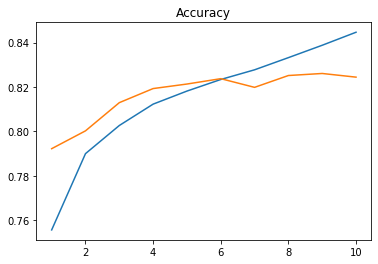

In [117]:
N_EPOCHS=10
metrics = history.history
t_acc = metrics["accuracy"]
t_loss = metrics["loss"]
v_acc = metrics["val_accuracy"]
v_loss = metrics["val_loss"]

epochs = range(1, N_EPOCHS + 1)

plt.plot(epochs, t_acc)
plt.plot(epochs, v_acc)
plt.title("Accuracy")


plt.show()

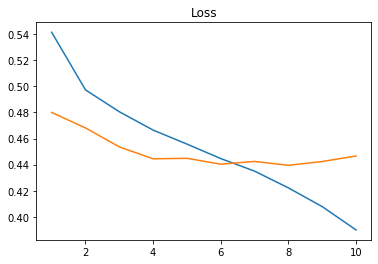

In [118]:
N_EPOCHS=10
metrics = history.history
t_acc = metrics["accuracy"]
t_loss = metrics["loss"]
v_acc = metrics["val_accuracy"]
v_loss = metrics["val_loss"]

epochs = range(1, N_EPOCHS + 1)

plt.plot(epochs, t_loss)
plt.plot(epochs, v_loss)
plt.title("Loss")


plt.show()

In [119]:
predictions = transfer_model.predict(x_test,batch_size=256)

In [120]:
y_pred = predictions
for i in range(len(predictions)):
    if predictions[i]>=0.5:
        y_pred[i]=1
    else:
        y_pred[i]=0

In [121]:
print(classification_report( y_test,y_pred))
print("AUC score ",roc_auc_score(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       0.87      0.89      0.88     49549
         1.0       0.71      0.66      0.69     20052

    accuracy                           0.83     69601
   macro avg       0.79      0.78      0.78     69601
weighted avg       0.82      0.83      0.82     69601

AUC score  0.7766206106267844


# GRU-LSTM

In [38]:
t = Tokenizer()
t.fit_on_texts(X_train)
word_index = t.word_index
N_vocab = len(t.word_index) + 1 # This +1 is used later 
print(N_vocab)

141185


In [39]:
x_train = pad_sequences(t.texts_to_sequences(X_train), maxlen = N_SEQ)
x_test   = pad_sequences(t.texts_to_sequences(X_test), maxlen = N_SEQ)
y_train = y_train.to_numpy(dtype = float).reshape(-1, 1)
y_test   = y_test.to_numpy(dtype = float).reshape(-1, 1)

In [40]:
# Maps each word in the embeddings vocabulary to it's embedded representation 
embeddings_index = {}
with open("glove.twitter.27B.200d[1].txt", "r", errors="ignore", encoding="utf8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype="float32")
        embeddings_index[word] = coefs

In [41]:
# Maps each word in our vocab to it's embedded representation, if the word is present in the GloVe embeddings
N_EMB = 200
embedding_matrix = np.zeros((N_vocab, N_EMB))
n_match = 0
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        n_match += 1
        embedding_matrix[i] = embedding_vector
print(n_match)

70720


In [42]:
# Dimensionality of the hidden state h_t outputted by the LSTM
DIM_HIDDEN = 64 

In [43]:
model=Sequential()
model.add(Input(shape=(N_SEQ,)))
model.add(Embedding(N_vocab,N_EMB, weights = [embedding_matrix], input_length = N_SEQ, trainable = False ))
model.add(GRU(units=DIM_HIDDEN,dropout = 0.5, return_sequences = True))
model.add(LSTM(units=DIM_HIDDEN,dropout = 0.5, return_sequences = True))
model.add(Flatten())

model.add(Dense(1024, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(32, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(1, activation = "sigmoid"))

In [44]:
check1 = tf.keras.callbacks.ModelCheckpoint(filepath="weights1.h5",monitor="val_accuracy",mode="max",save_best_only=True,)
log1 = CSVLogger('log1.csv', append=True, separator=',')

In [45]:
model.compile(optimizer = Adam(learning_rate = 0.0001), loss = "binary_crossentropy", metrics = ["accuracy"])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 64, 200)           28237000  
                                                                 
 gru (GRU)                   (None, 64, 64)            51072     
                                                                 
 lstm (LSTM)                 (None, 64, 64)            33024     
                                                                 
 flatten (Flatten)           (None, 4096)              0         
                                                                 
 dense (Dense)               (None, 1024)              4195328   
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 256)               2

In [48]:
history = model.fit(
    x_train, 
    y_train, 
    batch_size = 256, 
    epochs = 10,
    verbose=1,
    validation_data = (x_test, y_test), 
    callbacks=[check1,log1]
)

Epoch 1/10
1088/1088 [==============================] - ETA: 0s - loss: 0.5668 - accuracy: 0.7300WARNING: AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x00000121E60F9F78> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1088/1088 [==============================] - 221s 203ms/step - loss: 0.5668 - accuracy: 0.7300 - val_loss: 0.5165 - val_accuracy: 0.7643
Epoch 2/10
1088/1088 [==============================] - 228s 210ms/step - loss: 0.5335 - accuracy: 0.7560 - val_loss: 0.4947 - val_accuracy: 0.7796
Epoch 3/10
1088/1088 [==============================] - 231s 212ms/step - loss: 0.5203 - accuracy: 0.7659 - val_loss: 0.4949 - val_accuracy: 0.7736
Epoch 4/10
1088/

In [51]:
transfer_model = tf.keras.models.load_model('weights1.h5')

In [52]:
transfer_model.evaluate(x_test, y_test,batch_size=256, verbose=1)

272/272 [==============================] - 17s 61ms/step - loss: 0.4563 - accuracy: 0.8027


[0.45630770921707153, 0.8027327060699463]

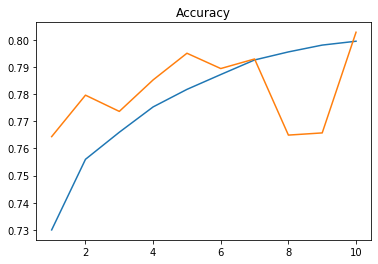

In [53]:
N_EPOCHS=10
metrics = history.history
t_acc = metrics["accuracy"]
t_loss = metrics["loss"]
v_acc = metrics["val_accuracy"]
v_loss = metrics["val_loss"]

epochs = range(1, N_EPOCHS + 1)

plt.plot(epochs, t_acc)
plt.plot(epochs, v_acc)
plt.title("Accuracy")


plt.show()

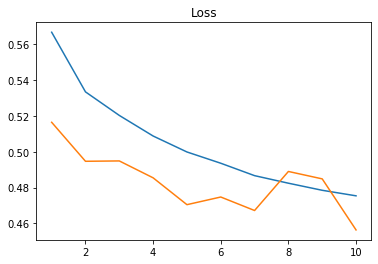

In [54]:
N_EPOCHS=10
metrics = history.history
t_acc = metrics["accuracy"]
t_loss = metrics["loss"]
v_acc = metrics["val_accuracy"]
v_loss = metrics["val_loss"]

epochs = range(1, N_EPOCHS + 1)

plt.plot(epochs, t_loss)
plt.plot(epochs, v_loss)
plt.title("Loss")


plt.show()

In [55]:
predictions = transfer_model.predict(x_test,batch_size=256)

In [56]:
y_pred = predictions
for i in range(len(predictions)):
    if predictions[i]>=0.5:
        y_pred[i]=1
    else:
        y_pred[i]=0

In [57]:
print(classification_report( y_test,y_pred))
print("AUC score ",roc_auc_score(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       0.87      0.85      0.86     49549
         1.0       0.65      0.68      0.67     20052

    accuracy                           0.80     69601
   macro avg       0.76      0.77      0.76     69601
weighted avg       0.81      0.80      0.80     69601

AUC score  0.7661953866968023
